<a href="https://colab.research.google.com/github/Mariusz-cpu/options-valuation/blob/master/Barreir_option_monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

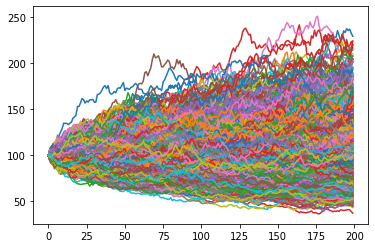

Value of barrier option down-and out = 9.143746556103114


In [62]:
#!/usr/bin/env python                                                                                                                                                                                              

import numpy as np
import matplotlib.pyplot as plt
from random import randint

seed = randint(0,100000)
K = 200
N = 2000
np.random.seed(seed)

S0 =100 #stock price
SP = 110 #strike_Price
r = 0.03 #drift
sigma = 0.3 #Volatility
H = 70 #barier
T = 1

dt = T / K
B=np.zeros((N, K))
B[:, 0] = S0
   
Si = S0*np.exp((r - 0.5*sigma**2)*dt + sigma * np.random.randn(N) * np.sqrt(dt))-S0
   
for k in range(K-1):
    B[:, k+1] = B[:, k]  + Si
    Si=(np.exp((r - 0.5*sigma**2)*dt + sigma * np.random.randn(N) * np.sqrt(dt))-1)*B[:,k+1]

plt.plot(B.T)
plt.show()

#elimination of rows where the share price dropped below barrier
B = (np.delete(B, np.where(B < H)[0], axis=0))
B = np.maximum(B,SP)

#calculation of option value
Option_Value=(1/N)*np.exp(-r)*T*np.sum(B[:,K-1]-SP) 

print('Value of barrier option down-and out =', Option_Value)
